# Import relevant packages

In [8]:
# LensFactory for lensing calcualtions
using LensFactory
using LensFactory.Constants

# For plotting
using CairoMakie

# Setting up cosmology

In [9]:
# Initialize default cosmology
cosmo = Cosmology.init_cosmology()

# Lens and source redshifts
zl = 0.5
zs = 1.5

# ADDs and distance ratio
Dol = Cosmology.angular_diameter_distance(cosmo, 0., zl)
Dls = Cosmology.angular_diameter_distance(cosmo, zl, zs)
Dos = Cosmology.angular_diameter_distance(cosmo, 0., zs)
adis = Dls/Dos

0.5672117739208741

# Let us lens a background Gaussian source by a point lens

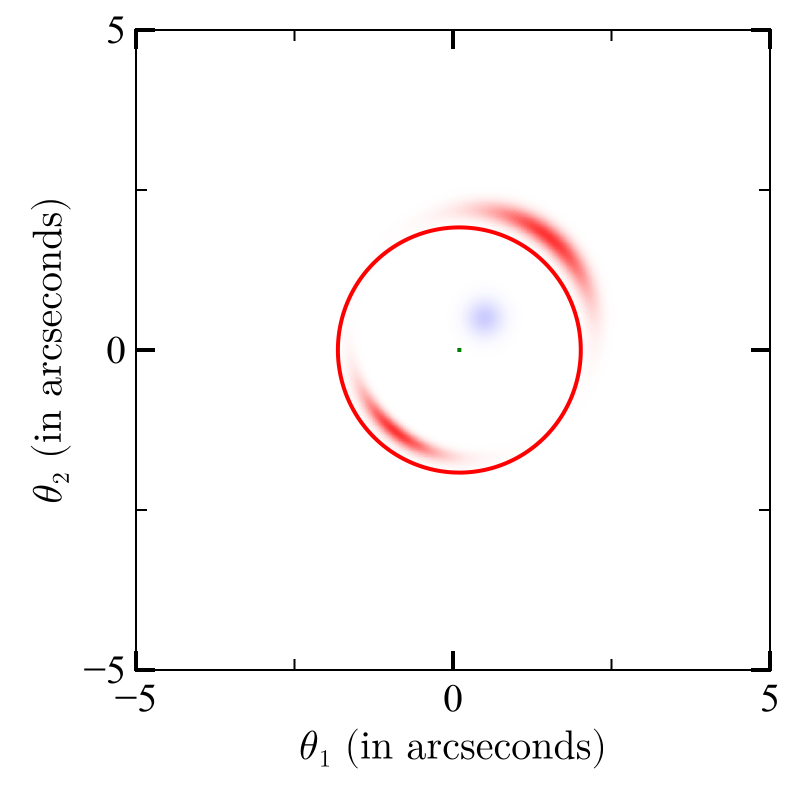

CairoMakie.Screen{IMAGE}


In [13]:
# Create image plane grid (default units are ANGLE_ARCSEC)
x, y = Lenses.get_meshgrid(5, 5, 0.01);

# Initialize an isolated point mass lens
lens = Lenses.init_PointLens(D_d = Dol, x_c=0.1, mass=1E12*MASS_SUN)

# Let us add an extended source
src = Sources.gaussian(x, y, 0.2, 0.2, (0.5, 0.5), A=1)

# Plot the source and image plane
fig, ax = Lenses.plot_image_plane(lens, x, y, adis; source=src)
display(fig)